# Save & Reload Neural Network

In [1]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) 
y = x.pow(2) + 0.2 * torch.rand(x.size())

x, y = Variable(x), Variable(y)   

In [2]:
# save a network
def save():
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.2) 
    loss_function = torch.nn.MSELoss() 
    epoch = 100

    for i in range(epoch):
        prediction = net1(x) 
        loss = loss_function(prediction, y) 
    
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step()
        
        
    # plot result
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=3)    
    
    torch.save(net1, 'net.pkl') # save the entrie net
    torch.save(net1.state_dict(), 'net_params.pkl') # save the parameters     

In [3]:
# restore the entire net
def restore_net():
    net2 = torch.load('net.pkl')
    prediction = net2(x)

    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=3)


In [4]:
# restore the parameters
def restore_params():
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)
    
    # plot result
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=3)
    plt.show()

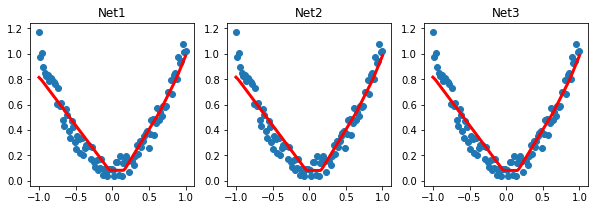

In [5]:
save()
restore_net()
restore_params()